In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import precision_score , recall_score, f1_score 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import svm
warnings.filterwarnings('ignore')
import xgboost as xgb

In [2]:
df = pd.read_csv("train.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [3]:
#Using value_counts to count number of is_promoted
df.is_promoted.value_counts()


0    50140
1     4668
Name: is_promoted, dtype: int64

In [4]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
df = df[df['education'].notna()]
df.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3739
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
df['previous_year_rating'].fillna(0, inplace = True)

In [7]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [8]:
df.shape

(52399, 13)

In [9]:
df = df.rename(columns = {'awards_won?': 'awards_won'}, inplace = False) #Colm's name changed
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [10]:
# Draw a hook with each column
def bar_chart(feature):
    promoted = df[df['is_promoted']==1][feature].value_counts()
    no_promoted = df[df['is_promoted']==0][feature].value_counts()
    df1 = pd.DataFrame([promoted,no_promoted])
    df1.index = ['promoted','no_promoted']
    df1.plot(kind='bar',stacked=True, figsize=(10,5))

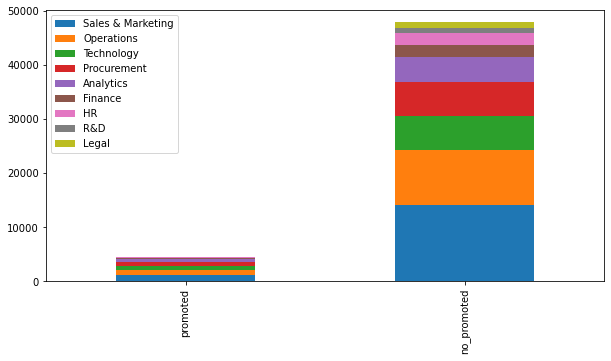

In [11]:
bar_chart("department")

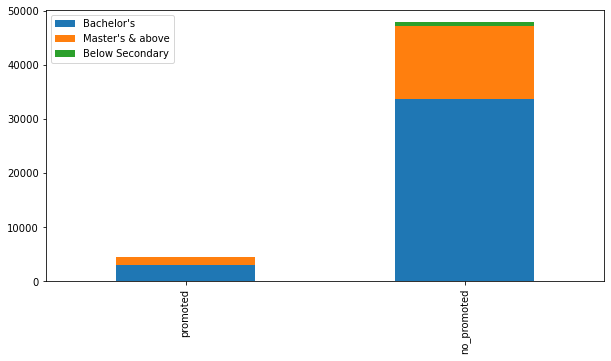

In [12]:
bar_chart("education")

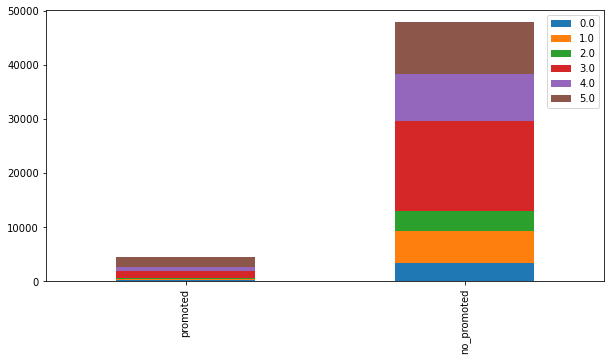

In [13]:
bar_chart("previous_year_rating")

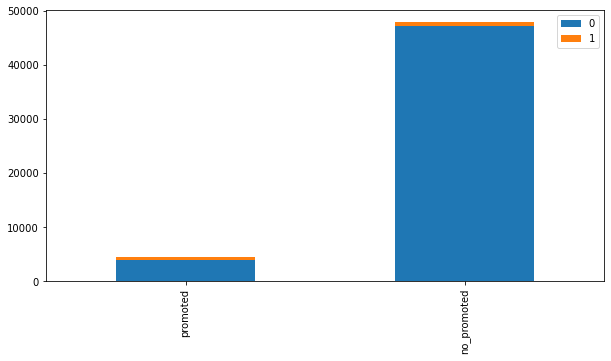

In [14]:
bar_chart("awards_won")

In [15]:
#Create a new column
df["department_N"]=df.department
df["education_N"]=df.education
df["gender_N"]=df.gender

# preprocessing

In [16]:
# Convert colum from string to number 
le = preprocessing.LabelEncoder()
df['department_N']= le.fit_transform(df.department.values)
df['education_N']= le.fit_transform(df.education.values)
df['gender_N']= le.fit_transform(df.gender.values)

In [17]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_N,education_N,gender_N
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,7,2,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,4,0,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,7,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,7,0,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49,0,7,0,1
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0,8,0,1
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0,4,2,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0,0,0,1


In [18]:
df1=df.copy()

In [19]:
# delete colum
df1.drop(columns="department",inplace=True)
df1.drop(columns="region",inplace=True)
df1.drop(columns="education",inplace=True)
df1.drop(columns="gender",inplace=True)
df1.drop(columns="recruitment_channel",inplace=True)
df1.drop(columns=['employee_id'],inplace=True)

In [20]:
df1

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_N,education_N,gender_N
0,1,35,5.0,8,0,49,0,7,2,0
1,1,30,5.0,4,0,60,0,4,0,1
2,1,34,3.0,7,0,50,0,7,0,1
3,2,39,1.0,10,0,50,0,7,0,1
4,1,45,3.0,2,0,73,0,8,0,1
...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,49,0,7,0,1
54803,1,48,3.0,17,0,78,0,8,0,1
54804,1,37,2.0,6,0,56,0,4,2,0
54805,1,27,5.0,3,0,79,0,0,0,1


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       52399 non-null  int64  
 1   age                   52399 non-null  int64  
 2   previous_year_rating  52399 non-null  float64
 3   length_of_service     52399 non-null  int64  
 4   awards_won            52399 non-null  int64  
 5   avg_training_score    52399 non-null  int64  
 6   is_promoted           52399 non-null  int64  
 7   department_N          52399 non-null  int32  
 8   education_N           52399 non-null  int32  
 9   gender_N              52399 non-null  int32  
dtypes: float64(1), int32(3), int64(6)
memory usage: 3.8 MB


In [22]:
# data splitting
B=df1.drop("is_promoted" ,axis =1)#Feature
A=df1["is_promoted"]#Target

In [23]:
B_train_val, B_test, A_train_val, A_test = train_test_split(B, A, test_size=0.2,random_state=42)
B_train, B_val, A_train, A_val = train_test_split(B_train_val, A_train_val, test_size=.25, random_state=43)

In [24]:
print("Shape of B Train Dataset: ",B_train.shape)
print("Shape of A Train Dataset: ", A_train.shape)
print("Shape of A val Dataset: ", A_val.shape)
print("Shape of B val Dataset: ",B_val.shape)
print("Shape of B test Dataset: ",B_test.shape)
print("Shape of A test Dataset: ",A_test.shape)

Shape of B Train Dataset:  (31439, 9)
Shape of A Train Dataset:  (31439,)
Shape of A val Dataset:  (10480,)
Shape of B val Dataset:  (10480, 9)
Shape of B test Dataset:  (10480, 9)
Shape of A test Dataset:  (10480,)


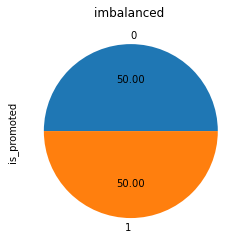

In [25]:
# solving a balance problem
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") 
B_train, A_train= ros.fit_resample(B_train, A_train)
ax = A_train.value_counts().plot.pie(autopct='%.2f')
ax = ax.set_title("imbalanced ")

# Scaler

from sklearn.preprocessing import StandardScaler

SC=StandardScaler()

B_train_s = SC.fit_transform(B_train)

A_test_s = SC.fit_transform(A_test)

# models with all the fatchars

# GridSearchCV   k-nearest neighbors vote

In [26]:
k2_range=list(range(1,31))
print(k2_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [27]:
param_grid2=dict(n_neighbors=k2_range)
print(param_grid2)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [28]:
knn2=KNeighborsClassifier()
grid2 = GridSearchCV(knn2, param_grid2, cv=5, scoring='recall')
grid2.fit(B_train,A_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='recall')

In [29]:
grid2.best_params_

{'n_neighbors': 3}

#  k-nearest neighbors vote

In [30]:
clk_2 =KNeighborsClassifier(n_neighbors=5)
clk_2.fit(B_train,A_train)
A_perv1 = clk_2.predict(B_val)
A_pert = clk_2.predict(B_test)

In [116]:
cf_matrix_val2 = metrics.confusion_matrix(A_val, A_perv1)
print(cf_matrix_val2)
#accuracy on knn
accuracy_test2 = metrics.accuracy_score(A_val, A_perv1)
print ('KNN  Accuracy = ', accuracy_test2 * 100)
#precision on knn
Precision_test2 = metrics.precision_score(A_val, A_perv1)
print ('KNN  Precision = ', Precision_test2*100)
#Recall on knn
Recall_test2 = metrics.recall_score(A_val, A_perv1)
print ('KNN  Recall = ', Recall_test2*100)
#F1 score on knn
f1_score_test2 = metrics.f1_score(A_val, A_perv1)
print ('KNN F1 score= ',f1_score_test2 * 100)
print(classification_report(A_val, A_perv1))

[[7860 1749]
 [ 480  391]]
KNN  Accuracy =  78.73091603053435
KNN  Precision =  18.27102803738318
KNN  Recall =  44.89092996555683
KNN F1 score=  25.971438060445035
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      9609
           1       0.18      0.45      0.26       871

    accuracy                           0.79     10480
   macro avg       0.56      0.63      0.57     10480
weighted avg       0.88      0.79      0.82     10480



In [118]:
cf_matrix_test2 = metrics.confusion_matrix(A_test, A_pert)
print(cf_matrix_test2)
#accuracy on knn
accuracy_test2 = metrics.accuracy_score(A_test, A_pert)
print ('KNN  Accuracy test= ', accuracy_test2 * 100)
#precision on knn
Precision_test2 = metrics.precision_score(A_test, A_pert)
print ('KNN  Precision test= ', Precision_test2*100)
#Recall on knn
Recall_test2 = metrics.recall_score(A_test, A_pert)
print ('KNN  Recall test= ', Recall_test2*100)
#F1 score on knn
f1_score_test2 = metrics.f1_score(A_test, A_pert)
print ('KNN F1 score test ',f1_score_test2 * 100)

print(classification_report(A_test,A_pert))

[[7913 1660]
 [ 487  420]]
KNN  Accuracy test=  79.51335877862596
KNN  Precision test=  20.192307692307693
KNN  Recall test=  46.30650496141124
KNN F1 score test  28.121861399397392
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      9573
           1       0.20      0.46      0.28       907

    accuracy                           0.80     10480
   macro avg       0.57      0.64      0.58     10480
weighted avg       0.88      0.80      0.83     10480



# GridSearchCV LogisticRegression

In [33]:
grid_values_2 = {'penalty': ['l1','l2'], 'C':[1,100,1000]}

In [34]:
penalty = ['l1', 'l2']
C = [0.5, 1, 100, 1000]
solver = ['liblinear', 'saga']

grid_values_2 = dict(penalty=penalty, C=C, solver=solver)
grid_values_2

{'penalty': ['l1', 'l2'],
 'C': [0.5, 1, 100, 1000],
 'solver': ['liblinear', 'saga']}

In [35]:
modalLogisr_2=LogisticRegression()
Logistic_2 = GridSearchCV(modalLogisr_2, grid_values_2, cv=5, scoring='recall')
Logistic_2.fit(B_train,A_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [36]:
Logistic_2.best_params_

{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}

# LogisticRegression

In [37]:
modalLogisr_2=LogisticRegression( C=100, penalty='l1', solver='liblinear')
modalLogisr_2.fit(B_train,A_train)
val_predict_2=modalLogisr_2.predict(B_val)
test_predict_2=modalLogisr_2.predict(B_test)

In [38]:
#val
cf_matrixLval_2 = metrics.confusion_matrix(A_val, val_predict_2)
print(cf_matrixLval_2)
#accuracy on LR
accuracyLval_2 = metrics.accuracy_score(A_val, val_predict_2)
print ('LogisticRegression  Accuracy = ', accuracyLval_2 * 100)
#precision on LR
PrecisionLval_2 = metrics.precision_score(A_val, val_predict_2)
print ('LogisticRegression  Precision = ', PrecisionLval_2*100)
#Recall on LR
RecallLval_2 = metrics.recall_score(A_val, val_predict_2)
print ('LogisticRegression  Recall = ', RecallLval_2*100)
#F1 score on LR
f1_scoreLval_2 = metrics.f1_score(A_val, val_predict_2)
print ('LogisticRegression F1 score= ',f1_scoreLval_2 * 100)
print(classification_report(A_val,val_predict_2))

[[6605 3004]
 [ 341  530]]
LogisticRegression  Accuracy =  68.08206106870229
LogisticRegression  Precision =  14.997170345217883
LogisticRegression  Recall =  60.84959816303099
LogisticRegression F1 score=  24.063564131668556
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      9609
           1       0.15      0.61      0.24       871

    accuracy                           0.68     10480
   macro avg       0.55      0.65      0.52     10480
weighted avg       0.88      0.68      0.75     10480



In [39]:
#Test
cf_matrixL_2 = metrics.confusion_matrix(A_test, test_predict_2)
print(cf_matrixL_2)
#accuracy on LR
accuracyL_2 = metrics.accuracy_score(A_test, test_predict_2)
print ('LogisticRegression  Accuracy test = ', accuracyL_2 * 100)
#precision on LR
PrecisionL_2 = metrics.precision_score(A_test, test_predict_2)
print ('LogisticRegression  Precision test= ', PrecisionL_2*100)
#Recall on LR
RecallL_2 = metrics.recall_score(A_test, test_predict_2)
print ('LogisticRegression  Recall test= ', RecallL_2*100)
#F1 score on LR
f1_scoreL_2 = metrics.f1_score(A_test, test_predict_2)
print ('LogisticRegression F1 score test= ',f1_scoreL_2 * 100)
print(classification_report(A_test,test_predict_2))

[[6596 2977]
 [ 336  571]]
LogisticRegression  Accuracy =  68.38740458015266
LogisticRegression  Precision =  16.09357384441939
LogisticRegression  Recall =  62.95479603087101
LogisticRegression F1 score=  25.634118967452295
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      9573
           1       0.16      0.63      0.26       907

    accuracy                           0.68     10480
   macro avg       0.56      0.66      0.53     10480
weighted avg       0.88      0.68      0.75     10480



#Test
cf_matrixL_2 = metrics.confusion_matrix(A_test, test_predict_2)
print(cf_matrixL_2)
#accuracy on LR
accuracyL_2 = metrics.accuracy_score(A_test, test_predict_2)
print ('LogisticRegression  Accuracy = ', accuracyL_2 * 100)
#precision on LR
PrecisionL_2 = metrics.precision_score(A_test, test_predict_2)
print ('LogisticRegression  Precision = ', PrecisionL_2*100)
#Recall on LR
RecallL_2 = metrics.recall_score(A_test, test_predict_2)
print ('LogisticRegression  Recall = ', RecallL_2*100)
#F1 score on LR
f1_scoreL_2 = metrics.f1_score(A_test, test_predict_2)
print ('LogisticRegression F1 score= ',f1_scoreL_2 * 100)

#  GridSearchCV RandomFores

In [40]:
# Grid search
param_grid_22 = { 
    'n_estimators': [10,20, 30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [41]:
rfc_2=RandomForestClassifier()
CV_rfc_2 = GridSearchCV(rfc_2, param_grid=param_grid_22, cv= 5)
CV_rfc_2.fit(B_train, A_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40]})

In [42]:
CV_rfc_2.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 40}

# RandomFores

In [43]:
random_forest_2 = RandomForestClassifier(n_estimators= 20, max_depth=4, max_features= 'auto', criterion= 'gini' )
random_forest_2.fit(B_train, A_train)
random_pred_val2 = random_forest_2.predict(B_val)
random_pred_test2 = random_forest_2.predict(B_test)

In [44]:
#val
cf_matrixrara_val2 = metrics.confusion_matrix(A_val, random_pred_val2)
print(cf_matrixrara_val2)
#accuracy on RF
accuracyra_val2 = metrics.accuracy_score(A_val, random_pred_val2)
print ('RandomForest  Accuracy = ', accuracyra_val2 * 100)
#precision on RF
Precisionra_val2 = metrics.precision_score(A_val, random_pred_val2)
print ('RandomForest  Precision = ', Precisionra_val2*100)
#Recall on RF
Recallra_val2 = metrics.recall_score(A_val, random_pred_val2)
print ('RandomForest  Recall = ', Recallra_val2*100)
#F1 score on RF
f1_scorera_val2 = metrics.f1_score(A_val, random_pred_val2)
print ('RandomForest F1 score= ',f1_scorera_val2 * 100)
print(classification_report(A_val,random_pred_val2))

[[7453 2156]
 [ 400  471]]
RandomForest  Accuracy =  75.61068702290076
RandomForest  Precision =  17.92919680243624
RandomForest  Recall =  54.07577497129736
RandomForest F1 score=  26.929674099485418
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      9609
           1       0.18      0.54      0.27       871

    accuracy                           0.76     10480
   macro avg       0.56      0.66      0.56     10480
weighted avg       0.89      0.76      0.81     10480



In [45]:
#Test
cf_matrixrara_test2 = metrics.confusion_matrix(A_test, random_pred_test2)
print(cf_matrixrara_test2)
#accuracy on RF
accuracyra_test2 = metrics.accuracy_score(A_test, random_pred_test2)
print ('RandomForest  Accuracy = ', accuracyra_test2 * 100)
#precision on RF
Precisionra_test2 = metrics.precision_score(A_test, random_pred_test2)
print ('RandomForest  Precision = ', Precisionra_test2*100)
#Recall on RF
Recallra_test2 = metrics.recall_score(A_test, random_pred_test2)
print ('RandomForest  Recall = ', Recallra_test2*100)
#F1 score on RF
f1_scorera_test2 = metrics.f1_score(A_test, random_pred_test2)
print ('RandomForest F1 score= ',f1_scorera_test2 * 100)

[[7491 2082]
 [ 413  494]]
RandomForest  Accuracy =  76.19274809160305
RandomForest  Precision =  19.17701863354037
RandomForest  Recall =  54.46527012127894
RandomForest F1 score=  28.366350846971006


# GridSearchCV xgboost

In [46]:
import xgboost
from xgboost import XGBClassifier

In [47]:
estimator_22 = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [48]:
parameters_22 = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 90, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [49]:
alg_2 = xgb.XGBClassifier(objective='binary:logistic')

In [50]:
xgb_model_2 = xgb.XGBClassifier()
clf_2 = GridSearchCV(xgb_model_2, parameters_22, n_jobs=-1, scoring='precision', verbose=2, refit=True,cv=5)             
clf_2.fit(B_train,A_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[14:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [51]:
print(clf_2.best_params_)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 60}


# xgboost

In [52]:
import xgboost

In [53]:
modelxg_2 = xgboost.XGBClassifier(n_estimators= 200, max_depth=2)
modelxg_2.fit(B_train,A_train)
A_predxg_val2 = modelxg_2.predict(B_val)
A_predxg_2 = modelxg_2.predict(B_test)
print(classification_report(A_val,A_predxg_val2))

[14:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      9609
           1       0.23      0.61      0.33       871

    accuracy                           0.80     10480
   macro avg       0.59      0.71      0.61     10480
weighted avg       0.90      0.80      0.84     10480



In [54]:
#val
cf_matrixrarav_22 = metrics.confusion_matrix(A_val,A_predxg_val2)
print(cf_matrixrarav_22)
#accuracy on XG
accuracyrxgv_22 = metrics.accuracy_score(A_val,A_predxg_val2)
print('RandomForest  Accuracy = ', accuracyrxgv_22 * 100)
#precision on XG
Precisionraxv_22 = metrics.precision_score(A_val,A_predxg_val2)
print ('RandomForest  Precision = ', Precisionraxv_22*100)
#Recall on XG
Recallrav_22 = metrics.recall_score(A_val,A_predxg_val2)
print ('RandomForest  Recall = ', Recallrav_22*100)
#F1 score on XG
f1_scorerasv_22 = metrics.f1_score(A_val,A_predxg_val2)
print ('RandomForest F1 score= ',f1_scorerasv_22 * 100)
print(classification_report(A_val,A_predxg_val2))

[[7845 1764]
 [ 342  529]]
RandomForest  Accuracy =  79.90458015267176
RandomForest  Precision =  23.07021369385085
RandomForest  Recall =  60.73478760045924
RandomForest F1 score=  33.438685208596716
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      9609
           1       0.23      0.61      0.33       871

    accuracy                           0.80     10480
   macro avg       0.59      0.71      0.61     10480
weighted avg       0.90      0.80      0.84     10480



In [55]:
#test
cf_matrixrara_22 = metrics.confusion_matrix(A_test, A_predxg_2)
print(cf_matrixrara_22)
#accuracy on XG
accuracyrxg_22 = metrics.accuracy_score(A_test, A_predxg_2)
print ('RandomForest  Accuracy = ', accuracyrxg_22 * 100)
#precision on XG
Precisionrax_22 = metrics.precision_score(A_test, A_predxg_2)
print ('RandomForest  Precision = ', Precisionrax_22*100)
#Recall on XG
Recallrav_22 = metrics.recall_score(A_test, A_predxg_2)
print ('RandomForest  Recall = ', Recallrav_22*100)
#F1 score on XG
f1_scoreras_22 = metrics.f1_score(A_test, A_predxg_2)
print ('RandomForest F1 score= ',f1_scoreras_22 * 100)
print(classification_report(A_test,A_predxg_2))

[[7895 1678]
 [ 347  560]]
RandomForest  Accuracy =  80.67748091603053
RandomForest  Precision =  25.022341376228773
RandomForest  Recall =  61.742006615215
RandomForest F1 score=  35.6120826709062
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      9573
           1       0.25      0.62      0.36       907

    accuracy                           0.81     10480
   macro avg       0.60      0.72      0.62     10480
weighted avg       0.90      0.81      0.84     10480



cf_matrixrara_22 = metrics.confusion_matrix(A_test, A_predxg_2)
print(cf_matrixrara_22)
#accuracy on LR
accuracyrxg_22 = metrics.accuracy_score(A_test, A_predxg_2
print ('RandomForest  Accuracy = ', accuracyrxg_22 * 100)
#precision on LR
Precisionrax_22 = metrics.precision_score(A_test, A_predxg_2)
print ('RandomForest  Precision = ', Precisionrax_22*100)
#Recall on LR
Recallrav_22 = metrics.recall_score(A_test, A_predxg_2)
print ('RandomForest  Recall = ', Recallrav_22*100)
#F1 score on LR
f1_scoreras_22 = metrics.f1_score(A_test, A_predxg_2)
print ('RandomForest F1 score= ',f1_scoreras_22 * 100)

# GridSearchCV LGBM

In [56]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
gb_2=lgb.LGBMClassifier()
parameters_2 = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}


In [57]:
lgmb_22 = GridSearchCV(gb_2, parameters_2, n_jobs=-1, scoring='precision',cv=5)
lgmb_22.fit(B_train,A_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [5, 10, 20],
                         'min_child_samples': [5, 10, 15],
                         'num_leaves': [20, 40, 60, 80, 100],
                         'reg_alpha': [0, 0.01, 0.03]},
             scoring='precision')

In [58]:
print(lgmb_22.best_params_)

{'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 5, 'num_leaves': 100, 'reg_alpha': 0}


# LGBMClassifier

In [59]:
import lightgbm as lgb
modelgbm_2 = lgb.LGBMClassifier(learning_rate= 0.05, max_depth= 5, min_child_samples= 5, num_leaves= 20, reg_alpha= 0.01)
modelgbm_2.fit(B_train,A_train)

LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=5,
               num_leaves=20, reg_alpha=0.01)

In [60]:
y_lightgbm_predval_2 = modelgbm_2.predict(B_val)
y_lightgbm_pred_2 = modelgbm_2.predict(B_test)

cf_matrixrarass_22 = metrics.confusion_matrix(A_test, A_lightgbm_pred_2)
print(cf_matrixrarass_22)
#accuracy on LR
accuracyrass = metrics.accuracy_score(A_test, A_lightgbm_pred_2)
print ('LGBM  Accuracy = ', accuracyrass * 100)
#precision on LR
Precisionrsas = metrics.precision_score(A_test, A_lightgbm_pred_2)
print ('LGBM  Precision = ', Precisionrsas*100)
#Recall on LR
Recalslras = metrics.recall_score(A_test, A_lightgbm_pred_2)
print ('LGBM  Recall = ', Recalslras*100)
#F1 score on LR
f1_scsoreras = metrics.f1_score(A_test, A_lightgbm_pred_2)
print ('LGBM F1 score= ',f1_scsoreras * 100)

In [61]:
print(classification_report(A_val,y_lightgbm_predval_2))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      9609
           1       0.26      0.57      0.36       871

    accuracy                           0.83     10480
   macro avg       0.61      0.71      0.63     10480
weighted avg       0.90      0.83      0.86     10480



In [62]:
print(classification_report(A_test,y_lightgbm_pred_2))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      9573
           1       0.29      0.57      0.38       907

    accuracy                           0.84     10480
   macro avg       0.62      0.72      0.65     10480
weighted avg       0.90      0.84      0.86     10480



# GridSearchCV Support vector machines

tuned_parameters_2 = [
    {"kernel": ["rbf"], "gamma": [1e-2], "C":  list(range(1,31))},
    {"kernel": ["linear"]}]


clf_2 = GridSearchCV(SVC(), tuned_parameters_2, scoring='precision')
GridSearchCV_smvc_2= clf_2.fit(B_train,A_train)

GridSearchCV_smvc_2.best_params_

# Support vector machines

model_2 = SVC(kernel ='rbf', C = 10 , gamma = 0.01)
model_2.fit(B_train,A_train)
z_pred_2=model_2.predict(B_test)

print(classification_report(A_teat,z_pred_2))

cf_matrixraras_21 = metrics.confusion_matrix(A_test, z_pred_2)
print(cf_matrixraras_21)
#accuracy on LR
accuracyras_21 = metrics.accuracy_score(A_test, z_pred_2)
print ('SVM  Accuracy = ', accuracyras_21 * 100)
#precision on LR
Precisionras_21 = metrics.precision_score(A_test, z_pred_2)
print ('SVM  Precision = ', Precisionras_21*100)
#Recall on LR
Recallras_21 = metrics.recall_score(A_test, z_pred_2)
print ('SVM  Recall = ', Recallras_21*100)
#F1 score on LR
f1_scoreras_21 = metrics.f1_score(A_test, z_pred_2)
print ('SVM F1 score= ',f1_scoreras_21 * 100)

In [63]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [64]:
# The parameters inside the models can be varied 

lr = LogisticRegression()

# Get these models in a list
estimators = [('Random Forest', random_forest_2),
              ('LogisticRegression', modalLogisr_2),
              ('KNN', clk_2),
              ('LGBM', modelgbm_2), 
              ('Extreme Gradient Boost', modelxg_2)]
#Stack these models with StackingRegressor
stacking_clf = StackingClassifier(estimators=estimators,
                                       final_estimator=lr)
stacking_clf.fit(B_train,A_train)
Apredval = stacking_clf.predict(B_val)
Apred = stacking_clf.predict(B_test)
#matrix = confusion_matrix(A_test, Apred)
#sns.heatmap(matrix, annot=True, fmt="d");
#plt.title('Confusion Matrix');
#plt.xlabel('Predicted');
#plt.ylabel('True');

[15:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [65]:
lr = LogisticRegression()

estimators = [('Random Forest', random_forest_2),
              ('LogisticRegression', modalLogisr_2),
              ('KNN', clk_2),
              ('LGBM', modelgbm_2), 
              ('Extreme Gradient Boost', modelxg_2)]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr)
stacking_clf.fit(B_train,A_train)
Apred_val2 = stacking_clf.predict(B_val)
Apred = stacking_clf.predict(B_test)

[15:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

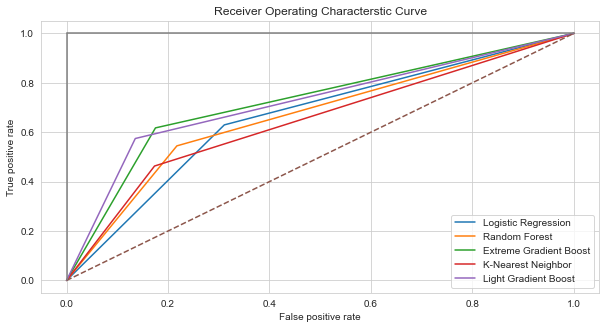

In [66]:
modalLogisr_2_false_positive_rate,modalLogisr_2_true_positive_rate,modalLogisr_2_threshold = metrics.roc_curve(A_test,test_predict_2)
random_forest_2_false_positive_rate,random_forest_2_true_positive_rate,random_forest_2_threshold = metrics.roc_curve(A_test, random_pred_test2)                                                             
modelxg_2_false_positive_rate,modelxg_2_true_positive_rate,modelxg_2_threshold = metrics.roc_curve(A_test,A_predxg_2)
clk_2_false_positive_rate,clk_2_true_positive_rate,clk_2_threshold = metrics.roc_curve(A_test,A_pert)
#model_2_false_positive_rate,model_2_true_positive_rate,model_2_threshold = metrics.roc_curve(y_test,y_pred_dtc)
modelgbm_2_false_positive_rate,modelgbm_2_true_positive_rate,modelgbm_2_threshold = metrics.roc_curve(A_test,y_lightgbm_pred_2)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(modalLogisr_2_false_positive_rate,modalLogisr_2_true_positive_rate,label='Logistic Regression')
plt.plot(random_forest_2_false_positive_rate,random_forest_2_true_positive_rate,label='Random Forest')
plt.plot(modelxg_2_false_positive_rate,modelxg_2_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(clk_2_false_positive_rate,clk_2_true_positive_rate,label='K-Nearest Neighbor')
#plt.plot(model_2_false_positive_rate,model_2_true_positive_rate,label='Support Vector Machine')
plt.plot(modelgbm_2_false_positive_rate,modelgbm_2_true_positive_rate,label='Light Gradient Boost')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [67]:
import pandas as pd

from sklearn.feature_selection import SelectFromModel

In [68]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(B_train, A_train)

SelectFromModel(estimator=RandomForestClassifier())

In [69]:
sel.get_support()

array([False,  True, False,  True, False,  True, False, False, False])

In [70]:
selected_feat= B_train.columns[(sel.get_support())]
len(selected_feat)

3

In [71]:
print(selected_feat)

Index(['age', 'length_of_service', 'avg_training_score'], dtype='object')


<BarContainer object of 9 artists>

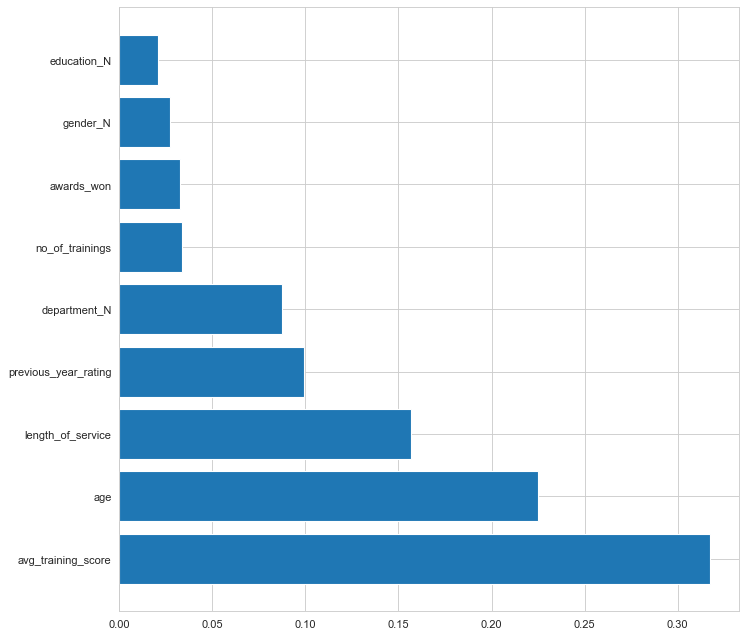

In [72]:
model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')

model.fit(B_train, A_train)

fi = pd.DataFrame({'feature': list(B_train),'importance': 
model.feature_importances_}).sort_values('importance', ascending = False)
plt.figure(figsize=(10, 10), dpi=80)
plt.barh(fi['feature'],fi['importance'])

In [73]:
y=df1["is_promoted"]
#df2= df1.filter(["awards_won","avg_training_score","awards_won1"], axis=1)
df2= df1.filter(['age', 'length_of_service', 'avg_training_score'], axis=1)
X=df2

In [74]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [75]:
print("Shape of X Train Dataset: ",X_train.shape)
print("Shape of Y Train Dataset: ", y_train.shape)
print("Shape of X test Dataset: ",X_test.shape)
print("Shape of Y test Dataset: ",y_test.shape)
print("Shape of X test Dataset: ",X_val.shape)
print("Shape of Y test Dataset: ",y_val.shape)

Shape of X Train Dataset:  (31439, 3)
Shape of Y Train Dataset:  (31439,)
Shape of X test Dataset:  (10480, 3)
Shape of Y test Dataset:  (10480,)
Shape of X test Dataset:  (10480, 3)
Shape of Y test Dataset:  (10480,)


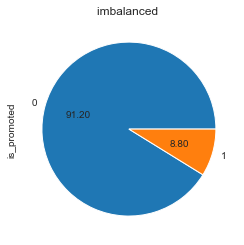

In [76]:
ax = y_train.value_counts().plot.pie(autopct='%.2f')
ax = ax.set_title("imbalanced ")


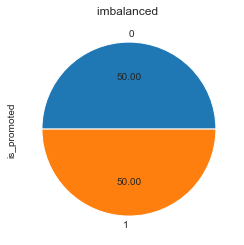

In [77]:
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(sampling_strategy="not majority") 
X_train, y_train= ros.fit_resample(X_train, y_train)

ax = y_train.value_counts().plot.pie(autopct='%.2f')
ax = ax.set_title("imbalanced ")

# GridSearchCV   k-nearest neighbors vote

In [78]:
k_range=list(range(1,31))
print(k_range)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [79]:
param_grid=dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [80]:
knn=KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='recall')

In [81]:
grid.best_params_

{'n_neighbors': 9}

#  k-nearest neighbors vote

In [82]:
clk =KNeighborsClassifier(n_neighbors=9)
clk.fit(X_train,y_train)
y_pervTES = clk.predict(X_val)
y_perv = clk.predict(X_test)

In [83]:
cf_matrix = metrics.confusion_matrix(y_val, y_pervTES)

#accuracy on KNN
accuracy = metrics.accuracy_score(y_val, y_pervTES)
print ('KNN   Accuracy = ', accuracy * 100)
#precision on KNN
Precision = metrics.precision_score(y_val, y_pervTES)
print ('KNN  Precision = ', Precision*100)
#Recall on KNN
Recall = metrics.recall_score(y_val, y_pervTES)
print ('KNN  Recall = ', Recall*100)
#F1 score on KNN
f1_score = metrics.f1_score(y_val, y_pervTES)
print ('KNN F1  score= ',f1_score * 100)
print(classification_report(y_val, y_pervTES))
f1_scorerass = metrics.f1_score(y_val, y_pervTES)



KNN   Accuracy =  65.92557251908397
KNN  Precision =  11.450599657338664
KNN  Recall =  46.0390355912744
KNN F1  score=  18.339812485707753
              precision    recall  f1-score   support

           0       0.93      0.68      0.78      9609
           1       0.11      0.46      0.18       871

    accuracy                           0.66     10480
   macro avg       0.52      0.57      0.48     10480
weighted avg       0.86      0.66      0.73     10480



In [84]:
cf_matrix = metrics.confusion_matrix(y_test, y_perv)

#accuracy on KNN
accuracy = metrics.accuracy_score(y_test, y_perv)
print ('KNN  Accuracy = ', accuracy * 100)
#precision on KNN
Precision = metrics.precision_score(y_test, y_perv)
print ('KNN  Precision = ', Precision*100)
#Recall on KNN
Recall = metrics.recall_score(y_test, y_perv)
print ('KNN  Recall = ', Recall*100)
#F1 score on KNN
f1_score = metrics.f1_score(y_test, y_perv)
print ('KNN F1 score= ',f1_score * 100)
print(classification_report(y_test, y_perv))
f1_scorerass = metrics.f1_score(y_test, y_perv)




KNN  Accuracy =  65.1526717557252
KNN  Precision =  11.39240506329114
KNN  Recall =  44.65270121278942
KNN F1 score=  18.15329448677723
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      9573
           1       0.11      0.45      0.18       907

    accuracy                           0.65     10480
   macro avg       0.52      0.56      0.48     10480
weighted avg       0.86      0.65      0.73     10480



# GridSearchCV LogisticRegression

In [85]:
grid_values = {'penalty': ['l1','l2'], 'C': list(range(1,31))}
model_lr = GridSearchCV(grid_values, param_grid=grid_values)

In [86]:
param_grid=dict(param_grid=grid_values)
print(param_grid)

{'param_grid': {'penalty': ['l1', 'l2'], 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}}


In [87]:
modalLogisr=LogisticRegression()
Logistic = GridSearchCV(modalLogisr, grid_values, cv=5, scoring='recall')
Logistic.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [88]:
Logistic.best_params_

{'C': 1, 'penalty': 'l2'}

# LogisticRegression

In [89]:
modalLogisr=LogisticRegression( C=1, penalty='l2', solver='liblinear')
modalLogisr.fit(X_train, y_train)
val_predict1=modalLogisr.predict(X_val)
val_predict=modalLogisr.predict(X_test)

f1s_scorerass = metrics.f1_score(y_test, val_predict)

In [90]:
cf_matrixL = metrics.confusion_matrix(y_val, val_predict1)
print(cf_matrixL)
#accuracy on LR
accuracyL = metrics.accuracy_score(y_val, val_predict1)
print ('LogisticRegression  Accuracy = ', accuracyL * 100)
#precision on LR
PrecisionL = metrics.precision_score(y_val, val_predict1)
print ('LogisticRegression  Precision = ', PrecisionL*100)
#Recall on LR
RecallL = metrics.recall_score(y_val, val_predict1)
print ('LogisticRegression  Recall = ', RecallL*100)
#F1 score on LR
f1_scoreL = metrics.f1_score(y_val, val_predict1)
print ('LogisticRegression F1 score= ',f1_scoreL * 100)
f1_scorerass = metrics.f1_score(y_val, val_predict1)
print(classification_report(y_val, val_predict1))

[[6109 3500]
 [ 359  512]]
LogisticRegression  Accuracy =  63.17748091603054
LogisticRegression  Precision =  12.761714855433699
LogisticRegression  Recall =  58.78300803673938
LogisticRegression F1 score=  20.970714724554572
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      9609
           1       0.13      0.59      0.21       871

    accuracy                           0.63     10480
   macro avg       0.54      0.61      0.48     10480
weighted avg       0.88      0.63      0.71     10480



In [91]:
cf_matrixL = metrics.confusion_matrix(y_test, val_predict)
print(cf_matrixL)
#accuracy on LR
accuracyL = metrics.accuracy_score(y_test, val_predict)
print ('LogisticRegression  Accuracy = ', accuracyL * 100)
#precision on LR
PrecisionL = metrics.precision_score(y_test, val_predict)
print ('LogisticRegression  Precision = ', PrecisionL*100)
#Recall on LR
RecallL = metrics.recall_score(y_test, val_predict)
print ('LogisticRegression  Recall = ', RecallL*100)
#F1 score on LR
f1_scoreL = metrics.f1_score(y_test, val_predict)
print ('LogisticRegression F1 score= ',f1_scoreL * 100)
f1_scorerass = metrics.f1_score(y_test, val_predict)
print(classification_report(y_test, val_predict))

[[6125 3448]
 [ 384  523]]
LogisticRegression  Accuracy =  63.43511450381679
LogisticRegression  Precision =  13.170486023671618
LogisticRegression  Recall =  57.662624035281155
LogisticRegression F1 score=  21.443214432144323
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      9573
           1       0.13      0.58      0.21       907

    accuracy                           0.63     10480
   macro avg       0.54      0.61      0.49     10480
weighted avg       0.87      0.63      0.71     10480



#  GridSearchCV RandomFores

In [92]:
# Grid search
param_grid = { 
    'n_estimators': [10,20, 30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [93]:
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40]})

In [94]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 20}

# RandomFores

In [95]:
random_forest = RandomForestClassifier(n_estimators= 40, max_depth=5, max_features= 'auto', criterion= 'gini' )
random_forest.fit(X_train, y_train)
random_preds = random_forest.predict(X_val)
random_pred = random_forest.predict(X_test)


In [96]:
cf_matrixrara = metrics.confusion_matrix(y_val, random_preds)
print(cf_matrixrara)
#accuracy on RF
accuracyra = metrics.accuracy_score(y_val, random_preds)
print ('RandomForest  Accuracy = ', accuracyra * 100)
#precision on RF
Precisionra = metrics.precision_score(y_val, random_preds)
print ('RandomForest  Precision = ', Precisionra*100)
#Recall on RF
Recallra = metrics.recall_score(y_val, random_preds)
print ('RandomForest  Recall = ', Recallra*100)
#F1 score on RF
f1_scorera = metrics.f1_score(y_val, random_preds)
print ('RandomForest F1 score= ',f1_scorera * 100)
print(classification_report(y_val, random_preds))

[[5874 3735]
 [ 329  542]]
RandomForest  Accuracy =  61.221374045801525
RandomForest  Precision =  12.672433949029694
RandomForest  Recall =  62.227324913892076
RandomForest F1 score=  21.056721056721056
              precision    recall  f1-score   support

           0       0.95      0.61      0.74      9609
           1       0.13      0.62      0.21       871

    accuracy                           0.61     10480
   macro avg       0.54      0.62      0.48     10480
weighted avg       0.88      0.61      0.70     10480



In [97]:
cf_matrixrara = metrics.confusion_matrix(y_test, random_pred)
print(cf_matrixrara)
#accuracy on RF
accuracyra = metrics.accuracy_score(y_test, random_pred)
print ('RandomForest  Accuracy = ', accuracyra * 100)
#precision on RF
Precisionra = metrics.precision_score(y_test, random_pred)
print ('RandomForest  Precision = ', Precisionra*100)
#Recall on RF
Recallra = metrics.recall_score(y_test, random_pred)
print ('RandomForest  Recall = ', Recallra*100)
#F1 score on RF
f1_scorera = metrics.f1_score(y_test, random_pred)
print ('RandomForest F1 score= ',f1_scorera * 100)
print(classification_report(y_test, random_pred))

[[5868 3705]
 [ 352  555]]
RandomForest  Accuracy =  61.288167938931295
RandomForest  Precision =  13.028169014084506
RandomForest  Recall =  61.19073869900772
RandomForest F1 score=  21.482485000967678
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      9573
           1       0.13      0.61      0.21       907

    accuracy                           0.61     10480
   macro avg       0.54      0.61      0.48     10480
weighted avg       0.87      0.61      0.70     10480



# GridSearchCV xgboost

In [98]:
import xgboost
from xgboost import XGBClassifier

In [99]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [100]:
parameters = {
    'max_depth': range (2, 10, 3),
    'n_estimators': range(1, 20, 1),
}

In [101]:
alg = xgb.XGBClassifier(objective='binary:logistic')

In [102]:
xgb_model = xgb.XGBClassifier()
clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, scoring='recall', verbose=2, refit=True,cv=5)             
clf.fit(X_train,y_train)



Fitting 5 folds for each of 57 candidates, totalling 285 fits
[15:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [103]:
print(clf.best_params_)

{'max_depth': 2, 'n_estimators': 1}


# xgboost

In [104]:
modelxg = xgboost.XGBClassifier(n_estimators=1, max_depth=2)
modelxg.fit(X_train,y_train)
y_predxgs = modelxg.predict(X_val)
y_predxg = modelxg.predict(X_test)

[15:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [105]:
cf_matrixrara = metrics.confusion_matrix(y_val, y_predxgs)
print(cf_matrixrara)
#accuracy on XG
accuracyrxg = metrics.accuracy_score(y_val, y_predxgs)
print ('xgboost  Accuracy = ', accuracyrxg * 100)
#precision on XG
Precisionrax = metrics.precision_score(y_val, y_predxgs)
print ('xgboost  Precision = ', Precisionrax*100)
#Recall on XG
Recallrav = metrics.recall_score(y_val, y_predxgs)
print ('xgboost  Recall = ', Recallrav*100)
#F1 score on XG
f1_scoreras = metrics.f1_score(y_val, y_predxgs)
print ('xgboost F1 score= ',f1_scoreras * 100)
print(classification_report(y_val, y_predxgs))

[[4919 4690]
 [ 245  626]]
xgboost  Accuracy =  52.91030534351145
xgboost  Precision =  11.775771256583898
xgboost  Recall =  71.87141216991964
xgboost F1 score=  20.23597866494262
              precision    recall  f1-score   support

           0       0.95      0.51      0.67      9609
           1       0.12      0.72      0.20       871

    accuracy                           0.53     10480
   macro avg       0.54      0.62      0.43     10480
weighted avg       0.88      0.53      0.63     10480



In [106]:
cf_matrixrara = metrics.confusion_matrix(y_test, y_predxg)
print(cf_matrixrara)
#accuracy on XG
accuracyrxg = metrics.accuracy_score(y_test, y_predxg)
print ('xgboost  Accuracy = ', accuracyrxg * 100)
#precision on XG
Precisionrax = metrics.precision_score(y_test, y_predxg)
print ('xgboost  Precision = ', Precisionrax*100)
#Recall on XG
Recallrav = metrics.recall_score(y_test, y_predxg)
print ('xgboost  Recall = ', Recallrav*100)
#F1 score on XG
f1_scoreras = metrics.f1_score(y_test, y_predxg)
print ('xgboost F1 score= ',f1_scoreras * 100)
print(classification_report(y_test, y_predxg))

[[4974 4599]
 [ 282  625]]
xgboost  Accuracy =  53.42557251908397
xgboost  Precision =  11.964012251148546
xgboost  Recall =  68.90848952590959
xgboost F1 score=  20.388191159680314
              precision    recall  f1-score   support

           0       0.95      0.52      0.67      9573
           1       0.12      0.69      0.20       907

    accuracy                           0.53     10480
   macro avg       0.53      0.60      0.44     10480
weighted avg       0.87      0.53      0.63     10480



# GridSearchCV LGBM

In [107]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
gb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}


In [108]:
lgmb = GridSearchCV(gb, parameters, n_jobs=-1, scoring='precision',cv=5)
lgmb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [5, 10, 20],
                         'min_child_samples': [5, 10, 15],
                         'num_leaves': [20, 40, 60, 80, 100],
                         'reg_alpha': [0, 0.01, 0.03]},
             scoring='precision')

In [109]:
print(lgmb.best_params_)

{'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 5, 'num_leaves': 100, 'reg_alpha': 0}


# LGBMClassifier

In [110]:
import lightgbm as lgb
modelgbm = lgb.LGBMClassifier(learning_rate= 0.2, max_depth= 20, min_child_samples= 5, num_leaves= 20, reg_alpha= 0.03)
modelgbm.fit(X_train,y_train)



LGBMClassifier(learning_rate=0.2, max_depth=20, min_child_samples=5,
               num_leaves=20, reg_alpha=0.03)

In [111]:
y_lightgbm_preds = modelgbm.predict(X_val)
y_lightgbm_pred = modelgbm.predict(X_test)

In [112]:
cf_matrixrarass = metrics.confusion_matrix(y_val, y_lightgbm_preds)
print(cf_matrixrarass)
#accuracy on LGBM
accuracyrass = metrics.accuracy_score(y_val, y_lightgbm_preds)
print ('LGBM  Accuracy = ', accuracyrass * 100)
#precision on LGBM
Precisionrsas = metrics.precision_score(y_val, y_lightgbm_preds)
print ('LGBM  Precision = ', Precisionrsas*100)
#Recall on LGBM
Recalslras = metrics.recall_score(y_val, y_lightgbm_preds)
print ('LGBM  Recall = ', Recalslras*100)
#F1 score on LGBM
f1_scsoreras = metrics.f1_score(y_val, y_lightgbm_preds)
print ('LGBM F1 score= ',f1_scsoreras * 100)
f1_scorerass = metrics.f1_score(y_val, y_lightgbm_preds)
print(classification_report(y_val, y_lightgbm_preds))

[[6450 3159]
 [ 407  464]]
LGBM  Accuracy =  65.97328244274809
LGBM  Precision =  12.807065967430306
LGBM  Recall =  53.27210103329506
LGBM F1 score=  20.649755229194476
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      9609
           1       0.13      0.53      0.21       871

    accuracy                           0.66     10480
   macro avg       0.53      0.60      0.49     10480
weighted avg       0.87      0.66      0.74     10480



In [113]:

cf_matrixrarass = metrics.confusion_matrix(y_test, y_lightgbm_pred)
print(cf_matrixrarass)
#accuracy on LGBM
accuracyrass = metrics.accuracy_score(y_test, y_lightgbm_pred)
print ('LGBM  Accuracy = ', accuracyrass * 100)
#precision on LGBM
Precisionrsas = metrics.precision_score(y_test, y_lightgbm_pred)
print ('LGBM  Precision = ', Precisionrsas*100)
#Recall on LGBM
Recalslras = metrics.recall_score(y_test, y_lightgbm_pred)
print ('LGBM  Recall = ', Recalslras*100)
#F1 score on LGBM
f1_scsoreras = metrics.f1_score(y_test, y_lightgbm_pred)
print ('LGBM F1 score= ',f1_scsoreras * 100)
f1_scorerass = metrics.f1_score(y_test, y_lightgbm_pred)
print(classification_report(y_test, y_lightgbm_pred))

[[6455 3118]
 [ 429  478]]
LGBM  Accuracy =  66.15458015267176
LGBM  Precision =  13.292547274749722
LGBM  Recall =  52.70121278941565
LGBM F1 score=  21.230290917166332
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      9573
           1       0.13      0.53      0.21       907

    accuracy                           0.66     10480
   macro avg       0.54      0.60      0.50     10480
weighted avg       0.87      0.66      0.73     10480



# GridSearchCV Support vector machines

tuned_parameters = {'C': [0.1, 1, 10],
              'gamma': [1, 0.01,0.1],
              'kernel': ['rbf','poly','linear']}


clf = GridSearchCV(SVC(), tuned_parameters, scoring='recall')
GridSearchCV_smvc= clf.fit(X_train,y_train)

GridSearchCV_smvc.best_params_

# Support vector machines


model = SVC(kernel ='rbf', C = 10 , gamma = 0.01)
model.fit(X_train,y_train)
z_pred=model.predict(X_test)


cf_matrixraras = metrics.confusion_matrix(y_test, z_pred)
print(cf_matrixraras)
#accuracy on LR
accuracyras = metrics.accuracy_score(y_test, z_pred)
print ('SVM  Accuracy = ', accuracyras * 100)
#precision on LR
Precisionras = metrics.precision_score(y_test, z_pred)
print ('SVM  Precision = ', Precisionras*100)
#Recall on LR
Recallras = metrics.recall_score(y_test, z_pred)
print ('SVM  Recall = ', Recallras*100)
#F1 score on LR
f1_scoreras = metrics.f1_score(y_test, z_pred)
print ('SVM F1 score= ',f1_scoreras * 100)
f1_scorerass = metrics.f1_score(y_test, z_pred)


# StackingClassifier

[15:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

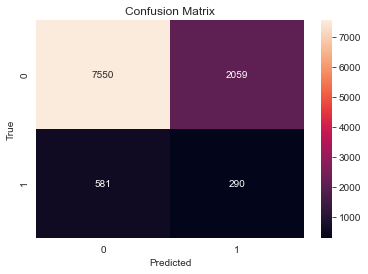

In [114]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


lr = LogisticRegression()
KNN_model= KNeighborsClassifier(n_neighbors=1) 
LOR_model = LogisticRegression( C=1, penalty='l2', solver='liblinear')
RNDOM_model = RandomForestClassifier(n_estimators= 40, max_depth=5, max_features= 'auto', criterion= 'gini' )
xgboost_model = xgboost.XGBClassifier(n_estimators= 200, max_depth=2)
# Get these models in a list
estimators = [('KNe', KNN_model),
              ('ogisticRegression', LOR_model),
              ('RandomForestClassifier', RNDOM_model),
              ('xgboost', xgboost_model)
             ]
#Stack these models with StackingRegressor
stacking_clf = StackingClassifier(estimators=estimators,
                                       final_estimator=lr)
stacking_clf.fit(X_train,y_train)
pred = stacking_clf.predict(X_val)
matrix = confusion_matrix(y_val, pred)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');
print(classification_report(y_val, pred))
accuracyrxqg = metrics.accuracy_score(y_val, pred)
print ('StackingClassifier  Accuracy = ', accuracyrxqg * 100)
#precision on LR
Precisionqrax = metrics.precision_score(y_val, pred)
print ('StackingClassifier  Precision = ', Precisionqrax*100)
#Recall on LR
Recasllrav = metrics.recall_score(y_val, pred)
print ('StackingClassifier  Recall = ', Recasllrav*100)
#F1 score on LR
f1_scsoreras = metrics.f1_score(y_val, pred)
print ('StackingClassifier F1 score= ',f1_scsoreras * 100)


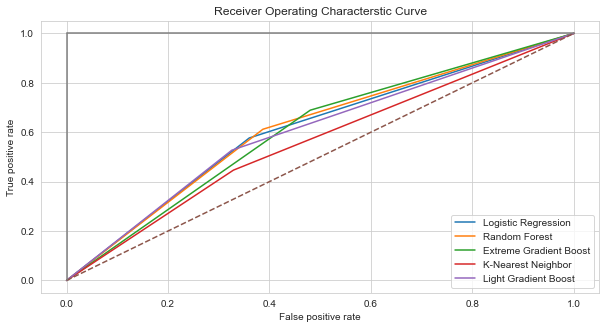

In [115]:
modalLogisr_false_positive_rate,modalLogisr_true_positive_rate,modalLogisr_threshold = metrics.roc_curve(y_test, val_predict)
random_forest_false_positive_rate,random_forest_true_positive_rate,random_forest_threshold = metrics.roc_curve(y_test, random_pred)                                                             
modelxg_false_positive_rate,modelxg_true_positive_rate,modelxg_threshold = metrics.roc_curve(y_test, y_predxg)
clk_false_positive_rate,clk_true_positive_rate,clk_threshold = metrics.roc_curve(y_test, y_perv)
#model_2_false_positive_rate,model_2_true_positive_rate,model_2_threshold = metrics.roc_curve(y_test,y_pred_dtc)
modelgbm_false_positive_rate,modelgbm_true_positive_rate,modelgbm_threshold = metrics.roc_curve(y_test, y_lightgbm_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(modalLogisr_false_positive_rate,modalLogisr_true_positive_rate,label='Logistic Regression')
plt.plot(random_forest_false_positive_rate,random_forest_true_positive_rate,label='Random Forest')
plt.plot(modelxg_false_positive_rate,modelxg_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(clk_false_positive_rate,clk_true_positive_rate,label='K-Nearest Neighbor')
#plt.plot(model_2_false_positive_rate,model_2_true_positive_rate,label='Support Vector Machine')
plt.plot(modelgbm_false_positive_rate,modelgbm_true_positive_rate,label='Light Gradient Boost')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()